# Problem Description

A manufacturer has 3 warehouses from which it distributes items to 5 customers. After elaborating a survey, the manufacturer found the production capacity at each factory, the transportation cost to customers, and the demand amount at each customer as shown below.

So, how much should the manufacturer send from each warehouse and via which routes, to **minimize the total transportation cost?**


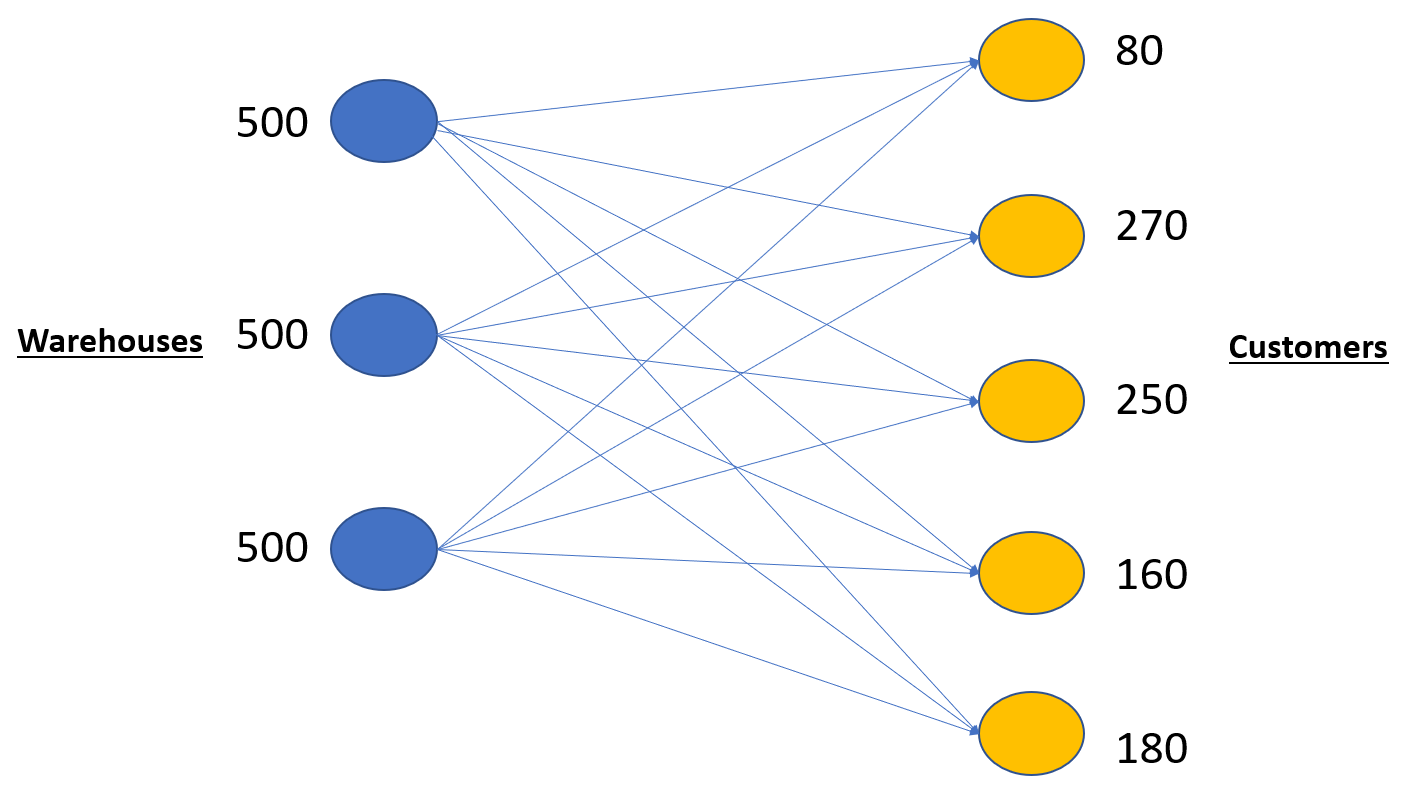


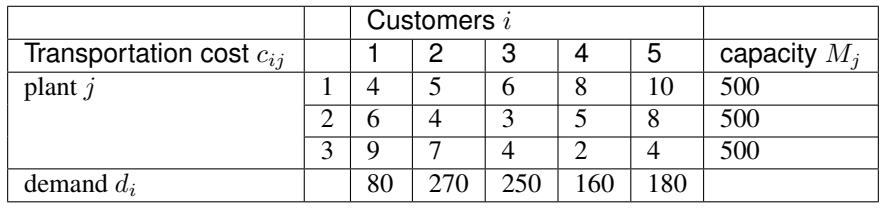

### Store the data in an usable format:

The first step is to store the data needed in a format that can be used in our optimization. In our case, we shall mainly be working with Python lists and dictionaries.

In [1]:
from pulp import *

# Creates a list of all the supply nodes
Warehouses = ["A","B","C"]

# Creates a dictionary for the number of units of supply from each warehouse
# to avoid confusion, I'm renaming the warehouses to "A,B,C" instead of "1,2,3"
supply = {"A": 500,
          "B": 500,
          "C": 500}


# Creates a list of all demand nodes
Customers = ["1", "2", "3", "4", "5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"1":80,
        "2": 270,
        "3": 250,
        "4": 160,
        "5": 180}

# Creates a list of costs of each transportation path
costs = [#Customers
    
        #1 2 3 4 5
        [4,5,6,8,10],#A  Warehouses
        [6,4,3,5,8],#B
        [9,7,4,2,4]#C        
        ]

costs = makeDict([Warehouses,Customers],costs,0)

### Define the type of optimization :

In our case, we want to minimize the total transportation cost, so we shall be using "LpMinimize"

In [2]:
prob = LpProblem("Supply_Distribution_Problem",LpMinimize)

### Generate the decision variables:

We have 2 sets of variables here:

   * Which routes to use?
   * How much to send via each route?
   
Since we have 3 warehouses and 5 customers, the total number of decision variables in our case will be 3*5 = 15



In [3]:
# A dictionary called route_vars is created to contain the referenced variables (the routes)
route_vars = LpVariable.dicts("Route",(Warehouses,Customers),0,None,LpInteger)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,c) for w in Warehouses for c in Customers]
Routes

[('A', '1'),
 ('A', '2'),
 ('A', '3'),
 ('A', '4'),
 ('A', '5'),
 ('B', '1'),
 ('B', '2'),
 ('B', '3'),
 ('B', '4'),
 ('B', '5'),
 ('C', '1'),
 ('C', '2'),
 ('C', '3'),
 ('C', '4'),
 ('C', '5')]

As seen, we have generated a list of all possible route options.

### Define the objective function :

Our objective function is concerned with minimizing the total transportation cost, which in our case is the sum of all possible routes times the route cost.

In [4]:
# The objective function is added to prob first
prob += lpSum([route_vars[w][c]*costs[w][c] for (w,c) in Routes]), "Sum of Transporting Costs"

### Define the constraints :

There are 2 constraints in our problem:
   
   * The customer demand should be met (no backorders)
   * The warehouse amount should be more than or equal to the customer demand

In [5]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([route_vars[w][c] for c in Customers]) <= supply[w]

# The demand minimum constraints are added to prob for each demand node (bar)
for c in Customers:
    prob += lpSum([route_vars[w][c] for w in Warehouses]) >= demand[c]

### Solving the problem:

On solving the problem, we get the optimal solution as well as the total transportation cost.

In [6]:
# The problem data is written to an .lp file
# print(prob)

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

print('--------------------------------')

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)    
        
print('--------------------------------')
        
# The optimised objective function value is printed to the screen
print("Total Cost of Transportation is  = ", value(prob.objective))

Status: Optimal
--------------------------------
Route_A_1 = 80.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_A_4 = 0.0
Route_A_5 = 0.0
Route_B_1 = 0.0
Route_B_2 = 270.0
Route_B_3 = 230.0
Route_B_4 = 0.0
Route_B_5 = 0.0
Route_C_1 = 0.0
Route_C_2 = 0.0
Route_C_3 = 20.0
Route_C_4 = 160.0
Route_C_5 = 180.0
--------------------------------
Total Cost of Transportation is  =  3210.0
